# Predicting Customer Churn

### Importing necessary Libraries

In [28]:
from google.colab import files

uploaded = files.upload()

Saving Telco customer churn.csv to Telco customer churn (1).csv


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [30]:
df=pd.read_csv('Telco customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cleaning and analysing data

In [32]:
df[df.isnull()==True].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

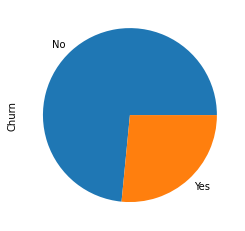

In [33]:
df['Churn'].value_counts(normalize=True).plot(kind='pie')

In [34]:
df.drop(['customerID'],axis=1,inplace=True)

In [35]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [36]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [37]:
df['SeniorCitizen'].replace(0,'False',inplace=True)
df['SeniorCitizen'].replace(1,'True',inplace=True)
df['SeniorCitizen'].value_counts()


False    5901
True     1142
Name: SeniorCitizen, dtype: int64

In [38]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'],errors='coerce')
df=df.dropna()
df.shape

(7032, 20)

### Model Prepration

In [39]:
data=pd.get_dummies(df,drop_first=True)

In [40]:
y = data["Churn_Yes"].values
X = data.drop(labels = ["Churn_Yes"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Accuracy Score

In [50]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8073916133617626


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction_test)

array([[945, 107],
       [164, 191]])

### Getting factors influencing results

In [43]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

InternetService_Fiber optic              0.595806
PaperlessBilling_Yes                     0.381807
SeniorCitizen_True                       0.264856
MultipleLines_No phone service           0.244158
PaymentMethod_Electronic check           0.229786
MultipleLines_Yes                        0.197016
StreamingTV_Yes                          0.187140
StreamingMovies_Yes                      0.143072
gender_Male                              0.056814
Partner_Yes                              0.046425
MonthlyCharges                           0.005464
TotalCharges                             0.000273
tenure                                  -0.060020
DeviceProtection_Yes                    -0.087779
PaymentMethod_Mailed check              -0.117270
OnlineSecurity_No internet service      -0.117444
OnlineBackup_No internet service        -0.117444
InternetService_No                      -0.117444
DeviceProtection_No internet service    -0.117444
TechSupport_No internet service         -0.117444


In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm=SVC()
Parameters={'C':[0.1,1,10],'gamma':[.00001,.0001,.001,.01,.1]}
searcher=GridSearchCV(svm,Parameters)
searcher.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
print(searcher.best_params_)

{'C': 10, 'gamma': 1e-05}


In [47]:
from sklearn import metrics
prediction_test = searcher.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7903340440653873


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction_test)

array([[975,  77],
       [218, 137]])